# 3. 어제 오른 내 주식, 과연 내일은?

오늘은 시계열 예측(Time-Series Prediction)을 다루는 여러 가지 통계적 기법 중에 가장 널리 알려진<br> ARIMA(Auto-regressive Integrated Moving Average)에 대해 알아보고<br> 이를 토대로 특정 주식 종목의 가격을 예측해 보는 실습을 진행해 보려고 합니다.

## 3-2. 시계열 예측이란(1) 미래를 예측한다는 것은 가능할까?

아래와 같은 미래 예측 시나리오를 생각해 봅시다.

* 지금까지의 주가 변화를 바탕으로 다음 주가 변동 예측
* 특정 지역의 기후데이터를 바탕으로 내일의 온도 변화 예측
* 공장 센터 데이터 변화 이력을 토대로 이상 발생 예측

위 예시의 공통점이 무엇일까요? 바로 예측의 근거가 되는 시계열(Time-Series) 데이터가 있다는 것입니다. <br>
**시계열이란 시간 순서대로 발생한 데이터의 수열이라는 뜻입니다.** 굳이 간단한 수식의 형태를 빌리자면 아래와 같이 표현될 것입니다.

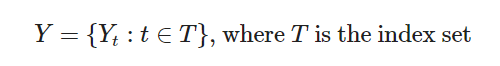

일정 시간 간격으로 발생한 데이터일 때가 많지만 꼭 그래야만 하는 것은 아닙니다. 매일의 주식 거래 가격을 날짜-가격 형태로 날짜순으로 모아둔 데이터가 있다면 훌륭한 시계열 데이터가 될 것입니다. 이때 날짜가 인덱스(index) 역할을 하게 됩니다.

. 특정 주식의 오늘까지의 매일 가격 변동 시계열 데이터가 수년 치 쌓여 있다고 칩시다.<br>
그럼 우리는 이 데이터를 토대로 내일의 이 주식 가격이 얼마가 될지, 심지어 오를지 내릴지조차, 예측이 가능한 것일까요? <br>
결론적으로 말하자면, 미래 예측은 불가능한 것입니다.<br>
그럼에도 불구하고 미래의 데이터를 예측하려 든다면 적어도 다음 두 가지의 전제가 필요합니다.

1. 과거의 데이터에 일정한 패턴이 발견된다.<br>
2. 과거의 패턴은 미래에도 동일하게 반복될 것이다.

위 두 가지 전제를 한 문장으로 줄이면 다음과 같습니다.

안정적(Stationary) 데이터에 대해서만 미래 예측이 가능하다.

시계열 데이터 분석은 완벽한 미래 예측을 보장하지는 않습니다.

어떤 예측하지 못한 외부적 변수에 의해 시계열 데이터 분석의 전제가 되는 안정성(stationarity)이 훼손될 여지가 있기 때문입니다.

그럼에도 불구하고, 시계열 데이터 분석은 프로세스 내재적인 시간적 변화를 묘사하는데 아주 훌륭한 성능을 보입니다.

그럼 다음 스텝에서 시계열의 안정적(Stationary)인 특성이란 무엇인지 좀 더 구체적으로 살펴보겠습니다.

### 3-3. 시계열 예측이란(2) Stationary한 시계열 데이터

안정적 시계열(Stationary Time-Series) 데이터의 수학적으로 엄밀한 정의보다는, <br>아래 링크에서 소개하는 직관적인 정의가 더 도움이 됩니다. 현실적으로 다루는 시계열 데이터는 이런 직관적인 안정성의 정의를 만족하는 정도면 충분히 ARIMA 등의 시계열 모델을 통해 분석이 용이하기 때문입니다.

아래 링크의 글에서 1. Basics – Time Series Modeling 파트를 읽어보신 후에 다음 질문에 답변해 주세요.

Q3. 안정적인 시계열에서 시간의 추이와 관계없이 일정해야 하는 통계적 특성 세 가지는 무엇인가요?

1. 평균

2. 분산

3. 공분산(정확히는 자기공분산-autocovariance이라고 해야 함)



공분산(Covariance)과 상관계수(Correlation)

평균으로써 분포의 중간부분을 알아내고

분산으로써 분포가 얼마나 퍼져있는지 알아낸다.



확률변수가 2가지일때 이 확률분포들이 어떤모양으로 되어있는지를 알고싶을때

가장 먼저 X의 평균, 다음이 Y의 평균이다.



이렇게 되면 대충 분포가 어디에 주로 모여있는지 (m_x, m_y)가 나온다.

그다음으로 궁금한게 얼마나 퍼져있는지 인데 그것은 확률변수의 분산을 구하면 되지만

각 확률변수들이 어떻게 퍼져있는지를 나타내는 것이 공분산(Covariance)이다.,



두 확률변수 X와 Y가 어떤 모양으로 퍼져있는지

즉, X가 커지면 Y도 커지거나 혹은 작아지거나 아니면 별 상관 없거나 등을 나타내어 주는 것이다.



Cov(X, Y) > 0    X가 증가 할 때 Y도 증가한다.

Cov(X, Y) < 0    X가 증가 할 때 Y는 감소한다.

Cov(X, Y) = 0    공분산이 0이라면 두 변수간에는 아무런 선형관계가 없으며 두 변수는 서로 독립적인 관계에 있음을 알 수 있다.

                       그러나 두 변수가 독립적이라면 공분산은 0이 되지만, 공분산이 0이라고 해서 항상 독립적이라고 할 수 없다.`

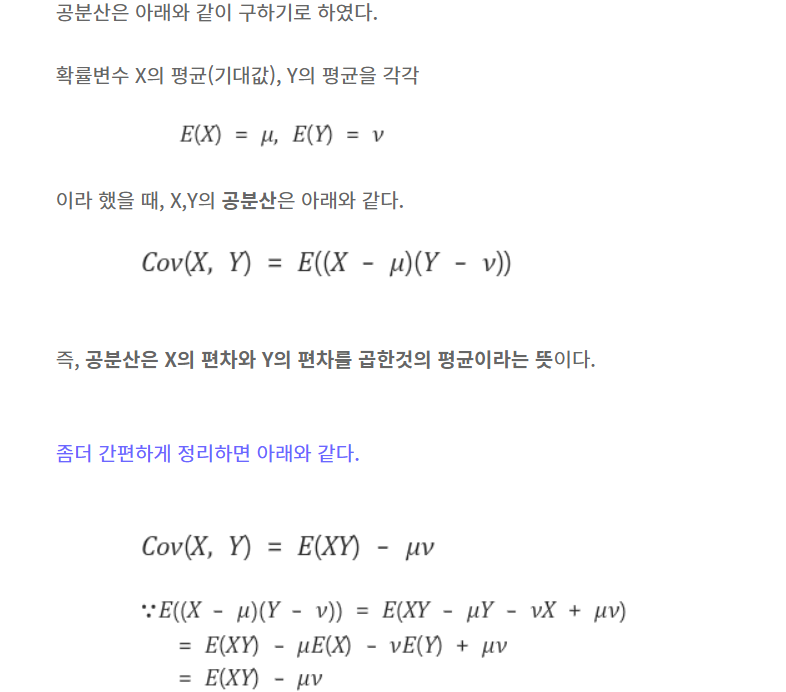

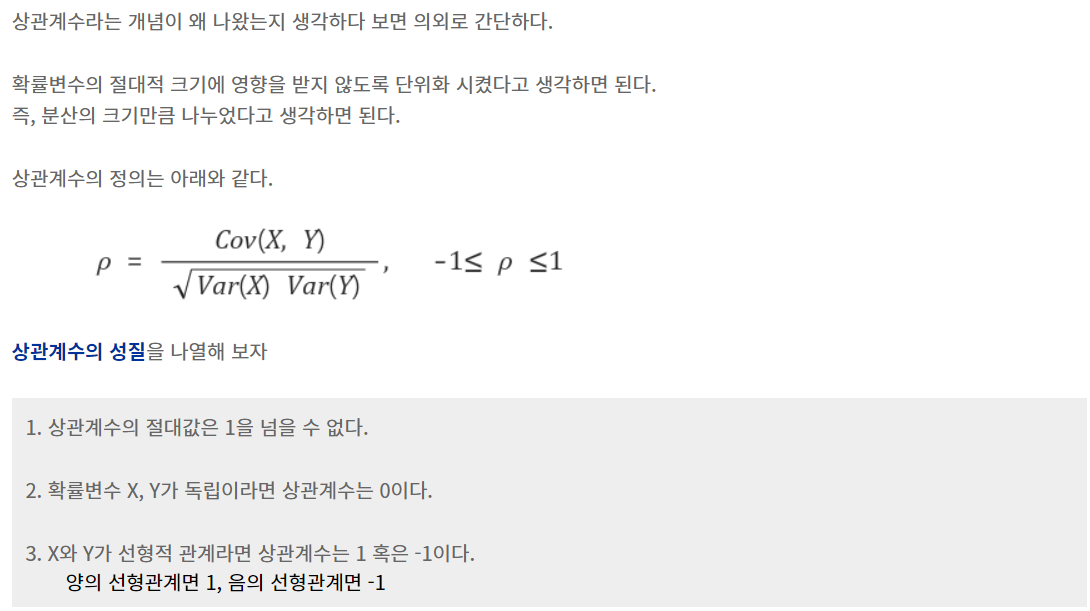

#### Q4. 두 확률변수 X, Y 변수의 분포가 서로 얼마나 상관성을 가지는지를 나타내는 지표라는 점에서 Covariance와 Correlation은 비슷한 개념입니다. 그렇다면 두 개념은 어떤 점에서 다른가요?

공분산가 X, Y 변수의 단위 크기에 영향을 받기 때문에 그 값 자체가 두 변수 간의 상관성을 직접적으로 대표하지 못한다.

그래서 Covariance를 Normalize하여(두 변수의 표준편차의 곱으로 나눠서) 두 변수 간의 상관성이 항상 -1에서 1 사이의 값 으로 표현되도록 보정한 것이 Correlation이다.

#### Q5. 만약 X와 X의 Covariance를 계산한다면 이것은 다음 중 무엇과 같아지나요?

분산(Variance) :분산이란 변수의 흩어진 정도를 계산하는 지표이다. 분산의 제곱근인 표준편차는 어떤 변수 x에 관하여 그 평균값 를 중심으로 보았을 때 각 관측값이 평균적으로 어느 정도 평균값에서 벗어나 있는지를 계산한 것이라고 생각해도 좋다.

#### Q6. 두 확률변수 X, Y가 서로 독립이면 Covariance와 Correlation은 어떻게 되나요?

Covariance와 Correlation은 모두 0이다.

#### Q7. 자기와의 공분산이라면 그냥 분산이 되는데, 분산이라고 하지 않고 자기공분산이라고 하는 이유는 무엇인가요?

X(t)와 X(t) 사이의 공분산이 아니라 X(t)와 X(t+h) 사이의 공분산이기 때문. 즉 일정 시차 h 사이를 둔 자기자신과의 공분산이기 때문이다.

#### Q8. X(t)와 X(t+h) 사이의 공분산과 X(t-h)와 X(t) 사이의 공분산은 항상 일정한가요? 아니면 어떤 조건 하에서만 성립하나요?

X가 Stationary한 시계열 변수라는 조건 하에서만 성립한다. 즉, 안정적인 시계열에 한해서 시차 h가 같다면 데이터의 상관성이 동일한 주기성이 나타난다.

이제 다시 안정적 시계열이 가져야 할 요건으로 돌아와 보겠습니다. 우리는 과거 몇 개의 데이터를 통해 다음 데이터를 예측해 보려고 합니다.

예시) 직전 5년 치 판매량 X(t-4), X(t-3), X(t-2), X(t-1), X(t)를 가지고 X(t+1)이 얼마일지 예측해보자.

이 예측이 의미가 있으려면 중요한 것은 t에 무관하게 이 예측이 맞아떨어져야 한다는 점입니다.

t=2010일 때의 데이터를 가지고 X(2011)을 정확하게 예측하는 모델이라면 이 모델에 t=2020을 대입해도 이 모델이 X(2021)을 정확하게 예측할 수 있어야 한다는 것입니다.

그러려면 t에 무관하게 X(t-4), X(t-3), X(t-2), X(t-1), X(t)의 평균과 분산이 일정 범위 안에 있어야 합니다.

또한 X(t-h)와 X(t)는 t에 무관하게 h에 대해서만 달라지는 일정한 상관도를 가져야 합니다.

그렇지 않으면 우리의 시계열 예측은 t에 따라 달라지는, 그때그때 달라요 예측이 됩니다. 이것은 과거의 패턴이 미래에도 반복될 것이다 라는 시계열 예측의 대전제를 무너뜨립니다.

## 3-4. 시계열 예측이란(3) 시계열 데이터 사례분석

이번 스텝에서는 잘 알려진 작은 시계열 데이터를 토대로 시계열 데이터의 안정성의 개념을 시각적으로 따져보겠습니다.

우선 아래와 같이 데이터를 준비해 주세요.

클라우드에 이미 올라가있는 데이터셋을 아래 명령어로 가져옵시다.

mkdir -p ~/aiffel/stock_prediction/data<br>
ln -s ~/data/* ~/aiffel/stock_prediction/data

### 시계열(Time Series) 생성

첫 번째로 다루어볼 데이터는 Daily Minimum Temperatures in Melbourne입니다. 온도 변화를 다루는 시계열인 만큼 안정성이 있지 않을까요?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

print('슝=3')

슝=3


In [2]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


Pandas에서 제공하는 Series라는 자료구조가 있었던 것을 기억하시나요? 오늘 다루게 될 시계열(Time Series)이란 것도 결국 시간 컬럼을 index로 하는 Series로 표현됩니다. 우리가 읽어 들인 데이터 파일은 Pandas를 통해 2개의 컬럼을 가진 DataFrame으로 변환되었습니다. 이것은 아직 시계열의 데이터 구조는 아닙니다.

위의 DataFrame에서 Date 컬럼을 index로 삼아 시계열을 생성해 봅시다.

In [3]:
# 이번에는 Date를 index_col로 지정해 주었습니다. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [4]:
ts1 = df['Temp']  # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

DataFrame인 df와 Series인 df['Temp']는 index 구조가 동일하므로 Numpy, Pandas, Matplotlib 등 많은 라이브러리들이 호환해서 지원해 줍니다. 하지만 그렇지 않은 경우도 간혹 발생하므로 여기서는 명확하게 Series 객체를 가지고 진행하도록 하겠습니다.

### 시계열 안정성의 정성적 분석


이제 시계열이 준비되었으므로 시각화를 통해 안정성(Stationarity) 여부를 확인해 보겠습니다.

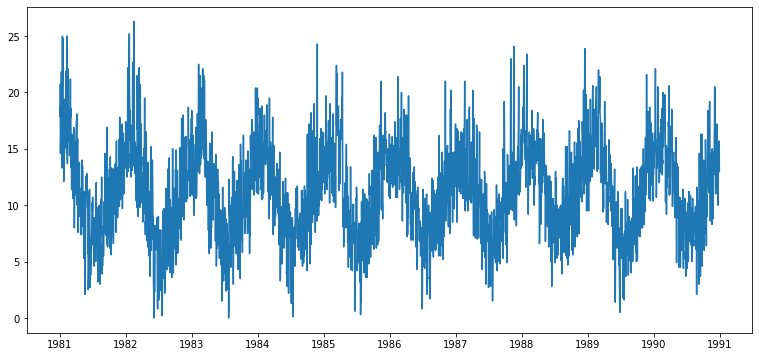

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

좋습니다. 멋진 차트가 그려졌군요.

하지만 분석에 들어가기 전에 잊지 말아야 할 단계가 하나 있습니다. 바로 결측치 유무 확인입니다.

In [6]:
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Temp, dtype: float64)

어떻습니까? 다행히 이 데이터에는 결측치가 없군요. 하지만 혹시 결측치가 있다면 조치가 필요합니다. NaN이 들어있는 데이터는 통계분석 시에 많은 오류를 일으킬뿐더러 분석 결과에도 악영향을 미칠 것입니다.

만약 결측치가 있다면, 두 가지 방법으로 결측치를 처리해 줄 수 있습니다.

1. 결측치가 있는 데이터를 모두 삭제(drop)

2. 결측치 양옆의 값들을 이용해서 적절히 보간(interpolate)하여 대입
   ex) 2와 4 사이 데이터가 NaN이라면 이 값을 3으로 채우는 방식

이번 경우라면 시간을 index로 가지는 시계열 데이터이므로 삭제하는 것보다는 보간하는 방법을 선택하겠습니다.

Pandas에서 결측치 보간을 처리하는 메서드는 다음과 같습니다. 상세한 설명은 이 아티클을 참고해 주세요.

Series([], Name: Temp, dtype: float64)


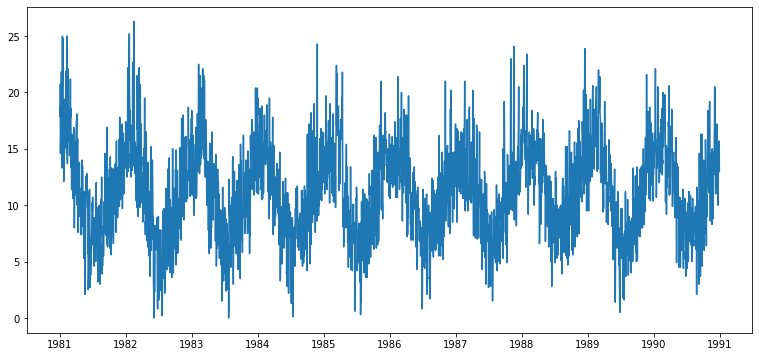

In [7]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)

어떻습니까? 시간 추이에 따라 일정한 평균, 분산, 자기공분산의 패턴이 나타나는 것 같습니까? 직관적으로 그래 보이긴 합니다만, 시계열 데이터의 통계적 특성을 좀 더 명료하게 시각화해 보겠습니다.

아래는 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수입니다.

현재 타임 스텝 부터 window에 주어진 타임 스텝 이전 사이

1. 구간의 평균(rolling mean, 이동평균)과<br>
2. 표준편차(rolling std, 이동표준편차)를<br>
원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있을 것입니다.

이동 평균이란 수의 집합에서 특정 크기의 부분 집합을 연속적으로 이동하며 산출한 평균입니다.<br>
이러한 이동평균은 가격,지수, 무게, 거래량, 거리 등 수치적으로 표현할 수 있는 모든 부분에 적용하여 활용할 수 있습니다.

이동평균은 일반 평균관느 다르게 한정되어있는 수 집합의 모든 값을 대상으로 평균을 산출하는 것과는 다르게 일정한 크기의 부분집합을 평균 계산에 활용한다는 것이 특징입니다.<br>

또한 이 부분집합을 이동시키며 연속적인 평균값을 산출함으로써 평균값의 흐름을 알 수 있게 하며, 일정 기간 혹은 데이터 구간의 평균의 흐름을 알 수 잇게 해줍니다.<br>

이러한 특징으로 인해 이동평균계산법에 의해 도출된 이동평균값은 주로 선으로 표현하여 시각화하며, 이렇게 시각화된 이동평균선은 추세 파악과 변화를 용이하게 해줌으로서 투자 분야에서 활발히 활발히 사용되고 있습니다.<br>

이동평균 계산법의 공식

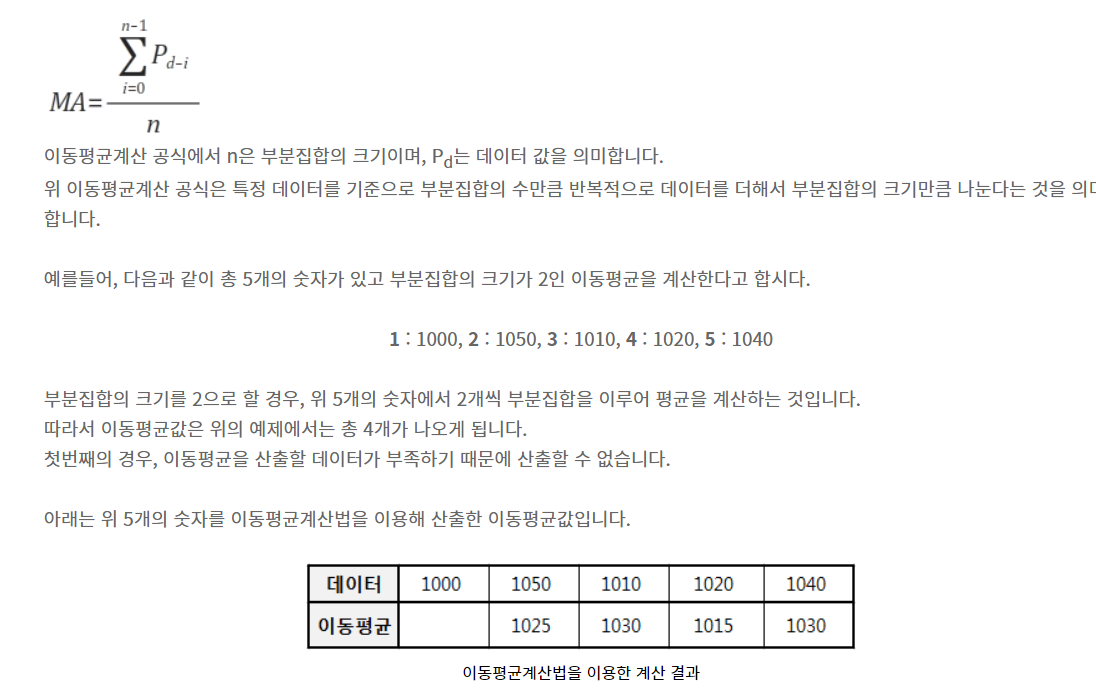

Q9. 다음 데이터에서 window 크기가 2인 이동평균을 구해보세요. [2, 8, 6, 10, 4]

A: 이동평균: [5, 7, 8, 7]

(2,8)/2 =5  

(8,6)/2=7  

(6,10)/2=8  

(10,4)/2=7

In [8]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


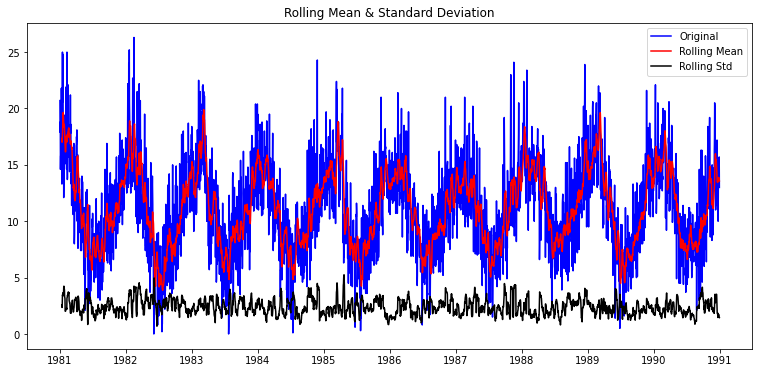

In [9]:
plot_rolling_statistics(ts1, window=12)

이 시계열 데이터가 안정적이라고 명확하게 결론을 내릴 수 있을까요?<br>
시각화한 결과만 놓고 보면 그렇다고 말할 수도 있겠습니다만, 명확하게 단정 지으려면 좀 더 통계적인 접근이 필요할 것입니다.<br>
그건 다음 스텝에서 다루기로 하고, 이번에는 다른 시계열 데이터의 패턴과 비교해 보면 어떨까요?

### 다른 데이터에 대해서도 비교해 보자.

이번에는 International airline passengers 데이터셋입니다. 월별 항공 승객 수(천명 단위)의 시계열 데이터인데 기온 변화 데이터셋과는 좀 다른 패턴이 나타나지 않을까요? 위와 동일한 방법으로 분석해 보겠습니다.

In [10]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


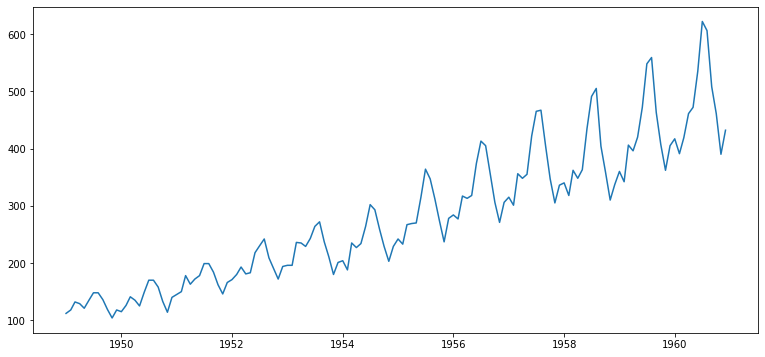

In [11]:
ts2 = df['Passengers']
plt.plot(ts2)

직관적으로 봐도 온도 변화 데이터셋과는 다른 패턴이 보입니다. 시간의 추이에 따라 시계열의 평균과 분산이 지속적으로 커지는 패턴을 보입니다. rolling statistics를 추가해서 시각화해 보겠습니다.

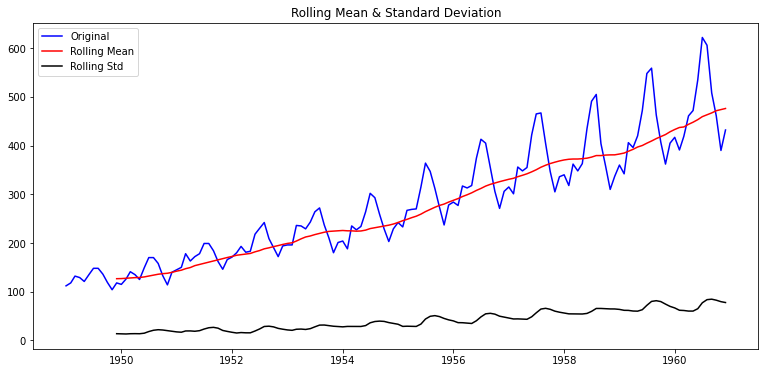

In [12]:
plot_rolling_statistics(ts2, window=12)

이렇게 시간의 추이에 따라 평균과 분산이 증가하는 패턴을 보인다면 이 시계열 데이터는 적어도 안정적이진 않다고 정성적인 결론을 내려볼 수 있을 것 같습니다. 그렇다면 이런 시계열 데이터에 대해서는 시계열 예측을 시도할 수 없는 것일까요? 그렇다면 이번 노드는 너무 재미가 없겠지요?

이후 스텝들에는 이런 불안정적(Non-Stationary) 시계열 데이터에 대한 시계열 분석 기법을 다루어 볼 것입니다.

위와 같이 우리는 시계열 데이터의 안정성을 시각화 방법을 통해 정성적으로 분석해 보았습니다. 이것은 시계열 데이터를 다루는 가장 기본적인 접근법이라 할 수 있습니다.

하지만 시계열 데이터의 안정성을 평가하는 데는 보다 정량적인 방법이 있습니다. 다음 스텝에서 그 방법을 알아보도록 하겠습니다.

## 3-5. 시계열 예측이란(4) Stationary 여부를 체크하는 통계적 방법

### Augmented Dickey-Fuller Test

이번 스텝에서는 Augmented Dickey-Fuller Test(ADF Test) 라는 시계열 데이터의 안정성(stationary)을 테스트하는 통계적 방법을 소개하려고 합니다.

이 테스트는

주어진 시계열 데이터가 안정적이지 않다라는 귀무가설(Null Hypothesis)를 세운 후,

통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에

이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택한다는 내용입니다.

p-value 정의는 “귀무가설이 참이라고 가정했을 때, 표본으로 얻어지는 통계치(예: 표본 평균)가 나타날 확률" 입니다. p값이 낮다는 것은 귀무가설이 참이라는 가정 하에서 표본을 추출했을 때, 이런 표본 평균이 관측될 확률이 낮다는 것을 뜻합니다. 즉 p 값이 매우 낮으면, 이러한 표본 통계량은 우연히 나타나기 어려운 케이스이기 때문에, 우리는 귀무가설을 채택하지 않고(기각하고), 대안적인 가설, 즉 대립가설을 채택하게 됩니다.

ADF 검정은 정상성을 알아보기 위한 단위근 검정 방법이에요. 참고로 단위근(unit root)이란 x=1, y=1인 해로, 시계열 자료에서 예측할 수 없는 결과를 가져올 수 있어요.

유의 확률이란?

p-value의 정의는 귀무가설을 가정했을 때의 확률분포 상에서 현재의 관측보다 더 극단적인 관측이 나올 확률로서, 귀무가설의 가정이 틀렸다고 볼 수 있는 확률이기도 하다. 이 값이 0.05 미만으로 매우 낮게 나온다면 p-value만큼의 오류 가능성 하에 귀무가설을 기각하고 대립가설을 채택할 수 있는 근거가 된다.

### statsmodels 패키지와 adfuller 메서드

statsmodels 패키지는 R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는 강력한 통계 패키지입니다. 이번 노드에서는 statsmodels 패키지의 기능을 자주 활용하게 될 것입니다.

아래는 statsmodels 패키지에서 제공하는 adfuller 메서드를 이용해 주어진 **timeseries에 대한 Augmented Dickey-Fuller Test**를 수행하는 코드 입니다.

클라우드 실습환경에는 이미 statsmodels 패키지가 설치돼 있습니다!
아래 코드를 바로 실행해 봅시다.

In [13]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


그럼 이전 스텝에서 정성적으로 분석해 보았던 두 시계열(Time Series)에 대한 Augmented Dickey-Fuller Test를 수행해 봅시다.

In [14]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


ts1(Daily Minimum Temperatures in Melbourne)시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 0에 가깝게 나타났습니다.

따라서 이 귀무가설은 기각되고, 이 시계열은 안정적 시계열이라는 대립가설이 채택됩니다.

In [15]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


ts2(International airline passengers) 시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 1에 가깝게 나타났습니다.

p-value가 1에 가깝다는 것이 이 귀무가설(주어진 시계열 데이터가 안정적이지 않다.) 이 옳다는 직접적인 증거는 아닙니다.

하지만 이 귀무가설을 기각할 수는 없게 되었으므로 이 시계열이 안정적인 시계열이라고 말할 수는 없습니다.

### 3-6. 시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?

이제 우리는 위에서 안정적이라고 말할 수 없게 된 International airline passengers 시계열을 조금 더 분석해 보겠습니다. 이전 스텝에서도 언급했듯, 안정적이지 않은 시계열을 분석하려면 이것을 안정적인 시계열로 바꾸어 내야 합니다. 이것이 어떻게 가능할까요?

크게 두 가지가 있습니다.



1. 정성적인 분석을 통해 보다 안정적(starionary)인 특성을 가지도록 기존의 시계열 데이터를 가공/변형하는 시도

2. 시계열 분해(Time series decomposition) 기법을 적용

### 1. 보다 Stationary한 시계열로 가공해 가기

1-1. 로그함수 변환<br>

가장 먼저 고려해 볼 수 있는 것은 시간 추이에 따라 분산이 점점 커지고 있다는 점입니다.<br>
시계열이 이런 특성을 보일 경우에는 로그함수로 변환을 해주는 것이 도움이 됩니다.

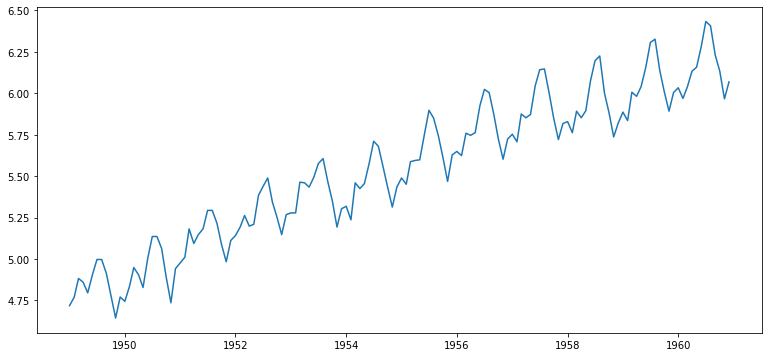

In [16]:
ts_log = np.log(ts2)
plt.plot(ts_log)

로그 변환의 효과가 어떠했는지 따져 보기 위해 Augmented Dickey-Fuller Test를 수행해 봅시다.

In [17]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-value가 0.42로 무려 절반 이상 줄어들었습니다. 정성적으로도 시간 추이에 따른 분산이 일정해진 것을 확인할 수 있습니다. 아주 효과적인 변환이었던 것 같습니다. 하지만 아직은 갈 길이 멉니다. 가장 두드러지는 문제점은 시간 추이에 따라 평균이 계속 증가한다는 점입니다.

### 1-2. Moving average 제거 - 추세(Trend) 상쇄하기

시계열 분석에서 위와 같이 시간 추이에 따라 나타나는 평균값 변화를 추세(trend)라고 합니다.<br>
이 변화량을 제거해 주려면 거꾸로 Moving Average, 즉 rolling mean을 구해서 ts_log에서 빼주면 어떨까요?

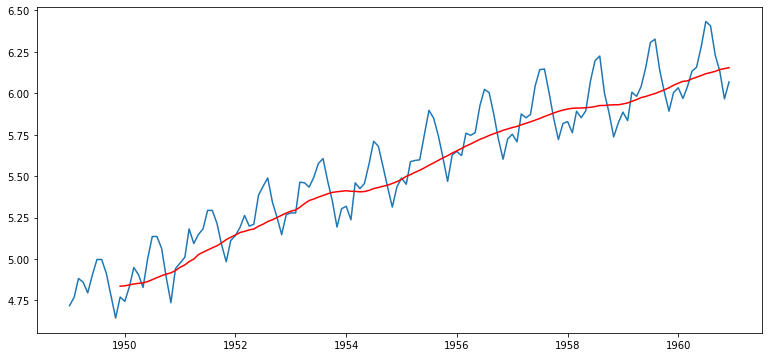

In [18]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [19]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

우리가 관심을 가진 ts_log_moving_avg에 거의 도달했습니다.<br>
그런데 문제는 Moving Average 계산 시 (windows size=12인 경우) 앞의 11개의 데이터는 Moving Average가 계산되지 않으므로 ts_log_moving_avg에 결측치(NaN)가 발생한다는 점입니다.<br>
이 결측치들은 향후 Dicky-Fuller Test 시에 에러를 발생시킬 것이므로 이를 데이터셋에서 제거해 줍니다

In [20]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

이제 이전 스텝에서 정의했던 메서드들을 활용하여 ts_log_moving_avg를 정성, 정량적으로 분석해 봅시다.


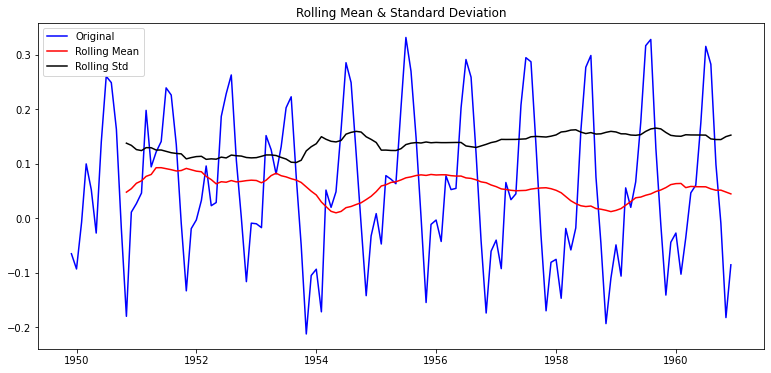

In [21]:
plot_rolling_statistics(ts_log_moving_avg)

In [22]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


드디어 p-value가 0.02 수준이 되었습니다. 95% 이상의 confidence로 이 time series는 stationary하다고 할 수 있겠습니다.

그러나 지금까지의 접근에서 한 가지 숨겨진 문제점이 있습니다.
바로 Moving Average를 계산하는 window=12로 정확하게 지정해 주어야 한다는 점입니다.

만약 위 코드에서 window=6을 적용하면 어떤 결과가 나올까요?

In [23]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')

슝=3


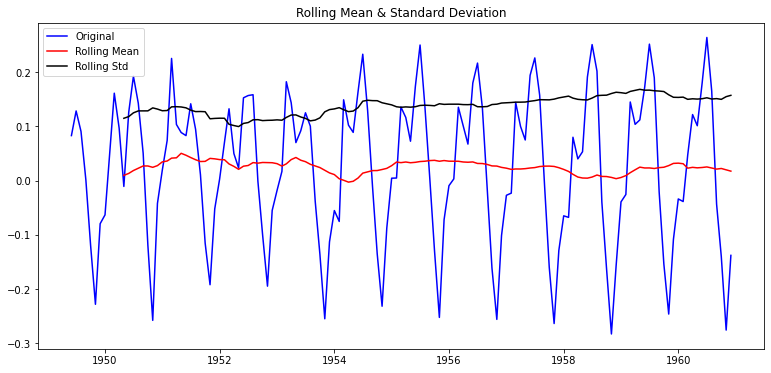

In [24]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [25]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


그래프를 정성적으로 분석해서는 window=12일 때와 별 차이를 느낄 수 없지만 Augmented Dickey-Fuller Test의 결과 p-value는 0.18 수준이어서 아직도 안정적 시계열이라고 말할 수 없게 되었습니다.<br>


이 데이터셋은 월 단위로 발생하는 시계열이므로 12개월 단위로 주기성이 있기 때문에 window=12가 적당하다는 것을 추측할 수도 있을 것 같습니다만,<br>
moving average를 고려할 때는 rolling mean을 구하기 위한 window 크기를 결정하는 것이 매우 중요하다는 것을 기억해 둡시다.

이제 시간의 추이에 따라 평균이 증가하는 trend를 제거하였습니다. 그러나 여전히 안정적인 시계열이라고 하기에는 마음에 걸리는 부분이 있습니다.

### 1-3. 차분(Differencing) - 계절성(Seasonality) 상쇄하기

Trend에는 잡히지 않지만 시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화는 예측에 방해가 되는 불안정성 요소입니다. 이것은 Moving Average 제거로는 상쇄되지 않는 효과입니다. 이런 계절적, 주기적 패턴을 계절성(Seasonality)라고 합니다.

이런 패턴을 상쇄하기 위해 효과적인 방법에는 차분(Differencing)이 있습니다.<br> 마치 미분(Differentiation)을 떠올리게 하는 개념인데요, 시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼 주는 방법입니다.<br>
이렇게 되면 남은 것은 현재 스텝 값 - 직전 스텝 값이 되어 정확히 이번 스텝에서 발생한 변화량을 의미하게 됩니다. 이 변화량 시계열은 어떤 패턴을 보이게 될까요?

우선 시프트한 시계열과 원본 시계열에 대한 그래프를 그려봅시다.

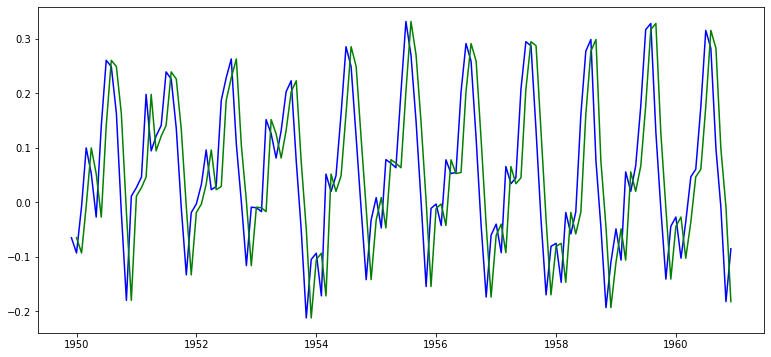

In [26]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

원본 시계열에서 시프트한 시계열을 뺀 값을 그래프로 표현해 봅시다.

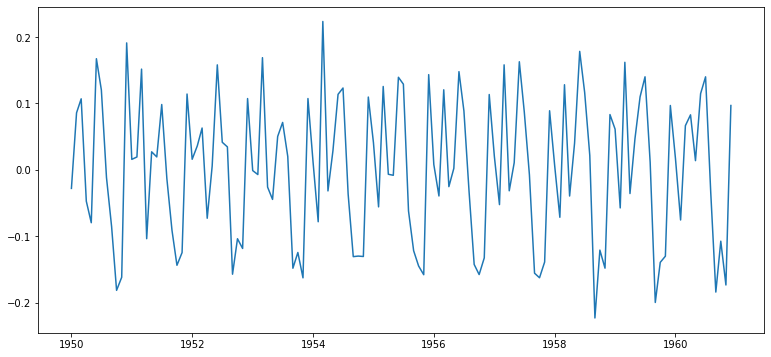

In [27]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

이동평균과, 이동표준편차를 그래프에 나타내어 정성적으로 안정성(stationary) 여부를 파악해 봅시다.

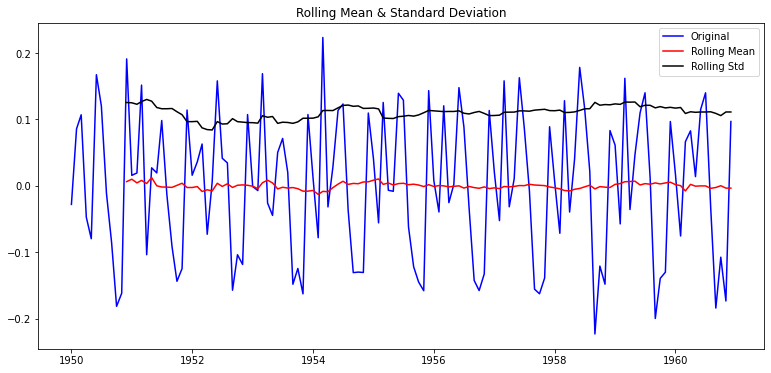

In [28]:
plot_rolling_statistics(ts_log_moving_avg_diff)

차분의 효과가 어떠했는지 알아보기 위해 Augmented Dickey-Fuller Test를 수행해 봅시다.

In [29]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


이동평균을 빼 주어 추세(Trend)를 제거하고 난 시계열에다가 1차 차분(1st order differencing)을 적용하여 Seasonality 효과를 다소 상쇄한 결과, p-value가 약 0.022 에서 0.0019로 1/10 정도로 줄었습니다.

데이터에 따라서는 2차 차분(2nd order differencing, 차분의 차분), 3차 차분(3rd order differencing, 2차 차분의 차분)을 적용하면 더욱 p-value를 낮출 수 있을지도 모릅니다.

### 2. 시계열 분해(Time series decomposition)

statsmodels 라이브러리 안에는 seasonal_decompose 메서드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있습니다. 이 기능을 활용하면 우리가 위에서 직접 수행했던 moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있게 됩니다. 이번에는 위에서 구했던 로그 변환 단계(ts_log)에서부터 출발해 봅시다.

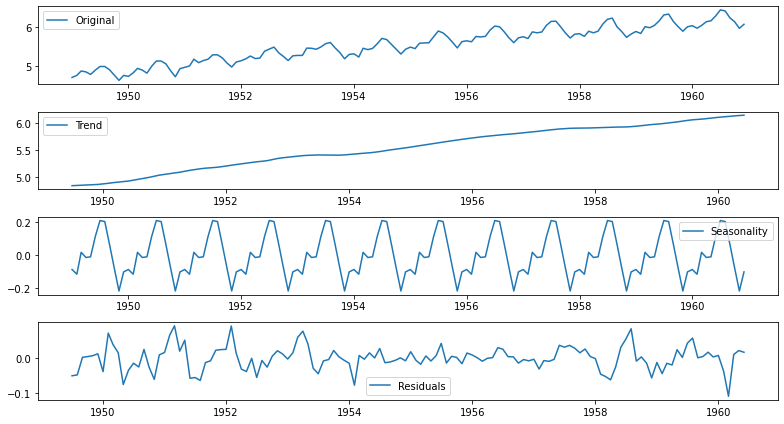

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지를 Residual이라고 합니다. 뒤집어서 말하면 Trend+Seasonality+Residual=Original 이 성립한다는 뜻입니다. 이러한 Decomposing은 시계열 데이터를 이해하는 중요한 관점을 제시해 줍니다.

그렇다면 이제 Residual에 대해 안정성 여부를 따져 봅시다.

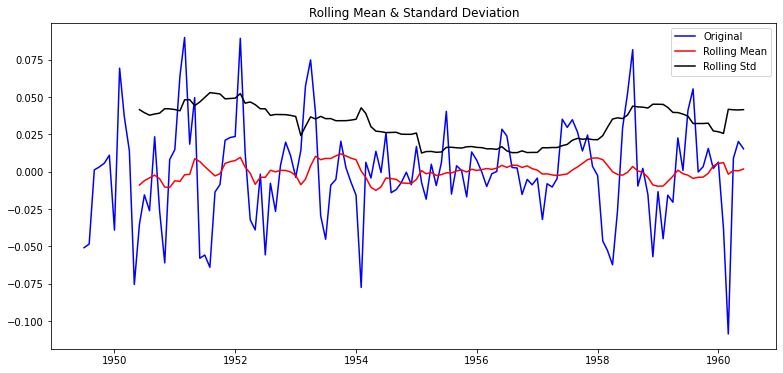

In [31]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [32]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


Decomposing을 통해 얻어진 Residual은 압도적으로 낮은 p-value를 보여 줍니다. 이 정도면 확실히 예측 가능한 수준의 안정적인 시계열이 얻어졌다고 볼 수 있겠습니다. <br>
어쩌면 굳이 애써 직접 Trend, Seasonality를 제거하려고 애쓸 필요가 없이 바로 Time Series Decomposing을 시도하는 게 더 낫지 않았을까요? 물론 그렇긴 합니다만,<br>
이렇게 Trend와 Seasonality를 제거해 주는 것이 어떤 효과를 발휘하게 되는지를 단계적으로 확인하는 과정이었다고 이해해 주시면 좋겠습니다.

## 3-7. ARIMA 모델의 개념

### 1. ARIMA 모델의 정의

앞에서 시계열 데이터가 Trend와 Seasonality, Residual로 분해되는 것을 확인했습니다, 또, Trend와 Seasonality를 잘 분리해 낸 경우 Residual이 예측력 있는 안정적인 시계열 데이터가 되는 것을 확인하였습니다.

ARIMA(Autoregressive Integrated Moving Average)를 사용하면 이 원리를 이용해 시계열 데이터 예측 모델을 자동으로 만들 수 있습니다.

ARIMA는 AR(Autoregressive) + I(Integrated) + MA(Moving Average) 라고 할 수 있는데, 각각의 개념을 살펴보면 지금까지 배운 개념과 닮아 있음을 알게 됩니다.

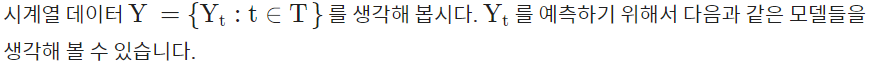

### 1-1. AR(자기회귀, Autoregressive)


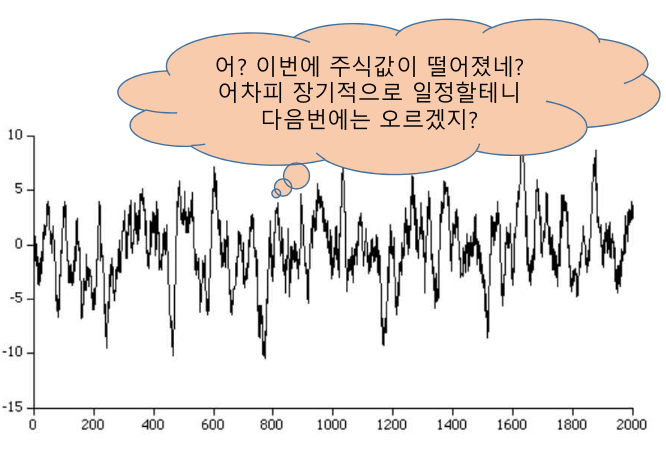

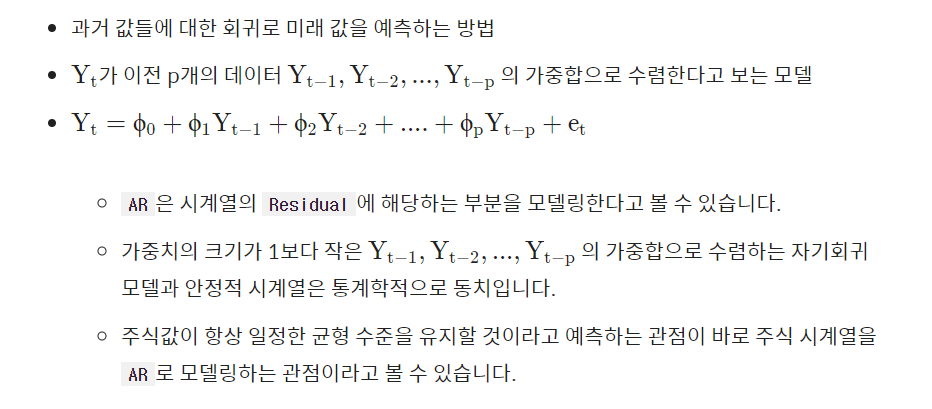

### 1-2. MA(이동평균, Moving Average)

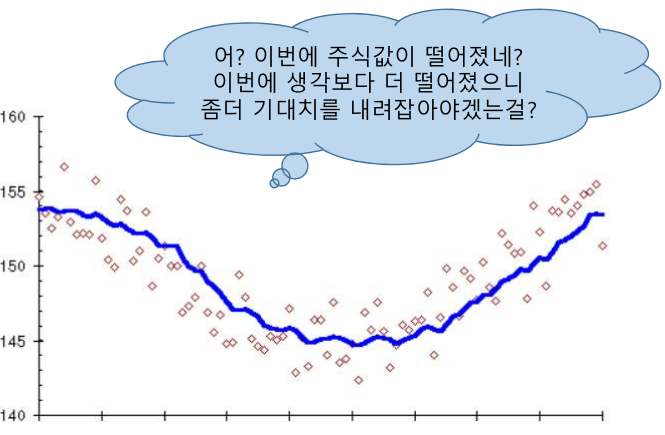

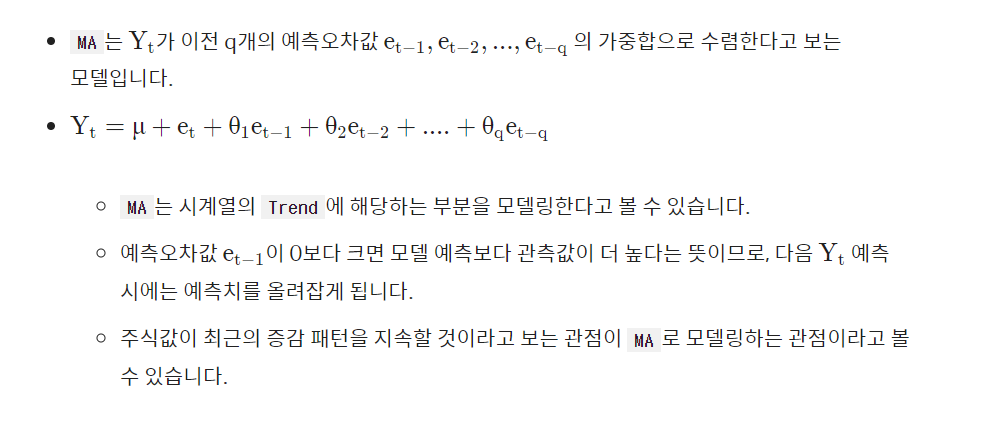

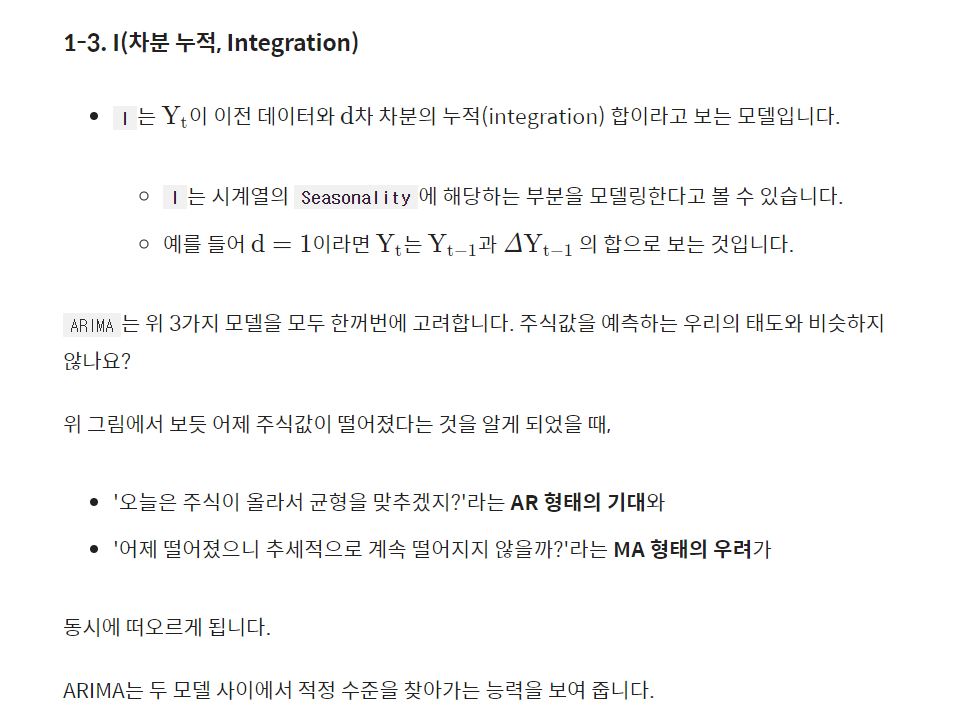

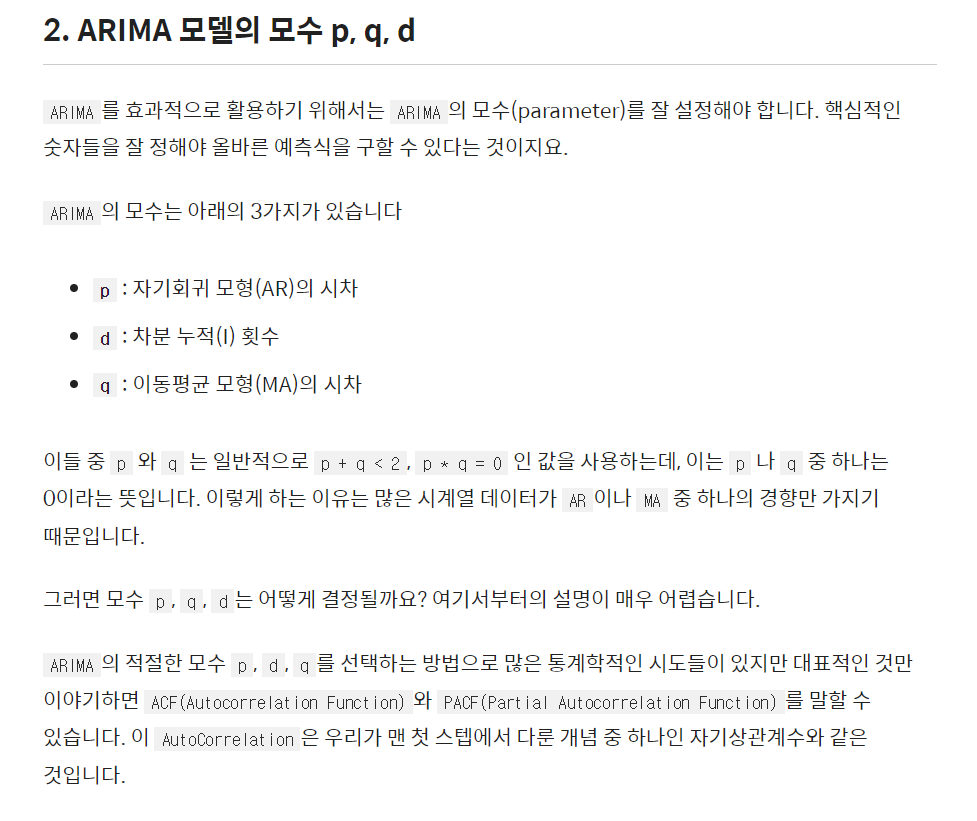

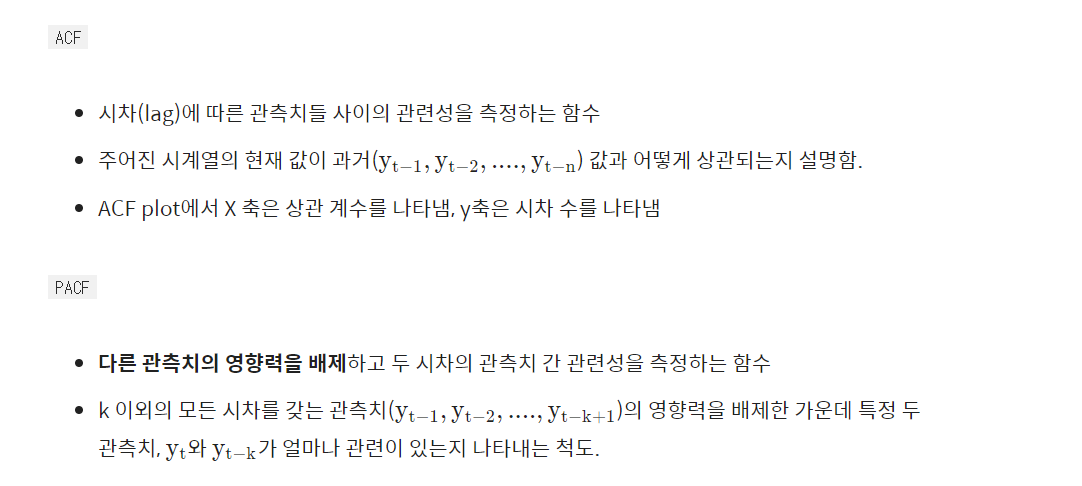

지난 스텝에서 다루었던 International airline passengers 시계열을 예시를 들어 설명하겠습니다. 우리는 statsmodels에서 제공하는 ACF와 PACF 플로팅 기능을 사용할 것입니다.

참고자료

http://kanggc.iptime.org/em/chap9/chap9.pdf

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

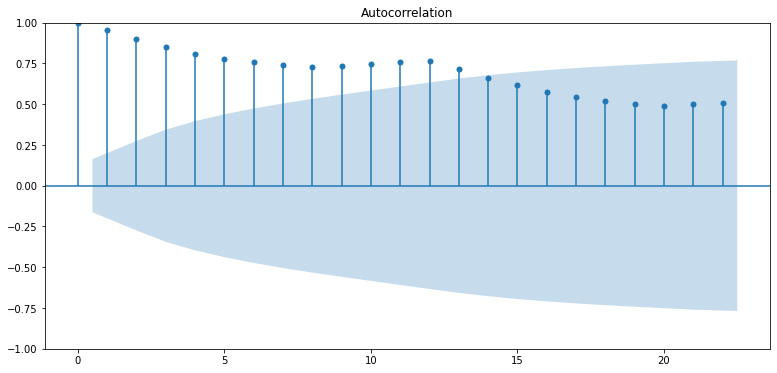

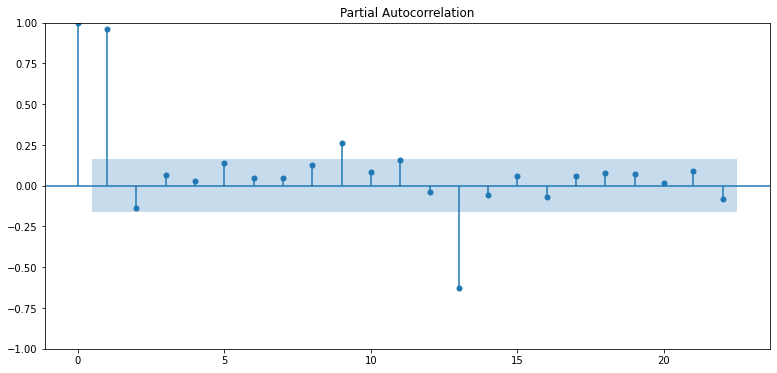

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

아래 그림은 ACF를 통해 MA 모델의 시차 q를 결정하고, PACF를 통해 AR 모델의 시차 p를 결정할 수 있음을 통계학적으로 설명하는 아티클에서 요약 결론 부분만 가져온 것입니다.

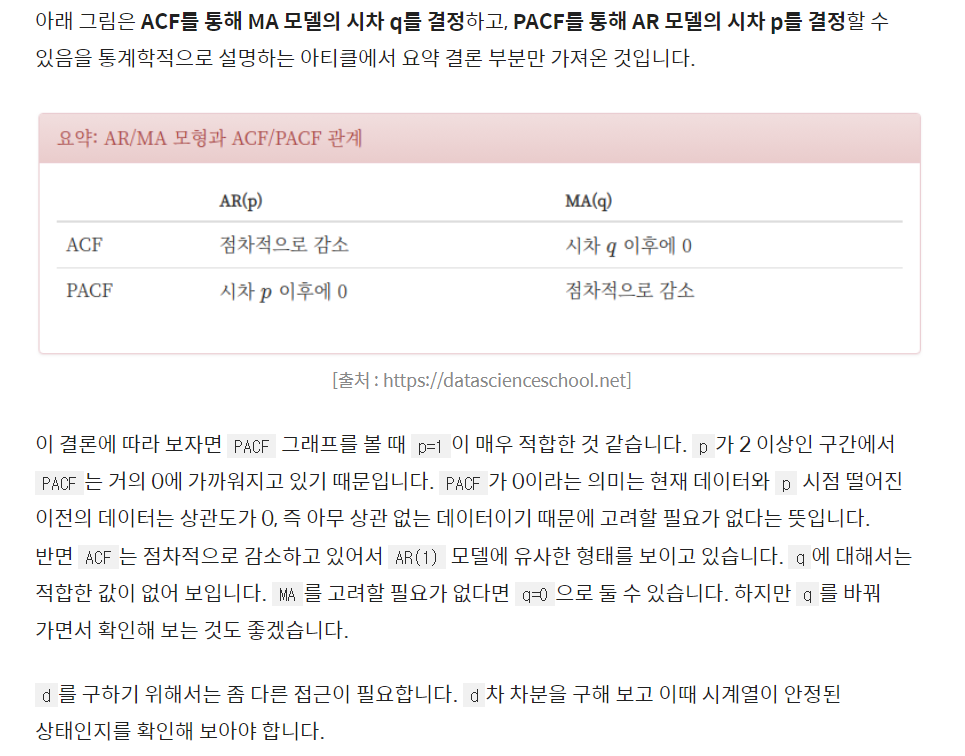

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


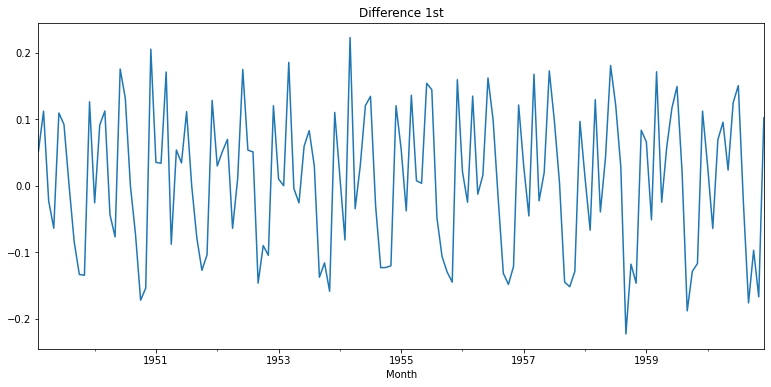

In [34]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


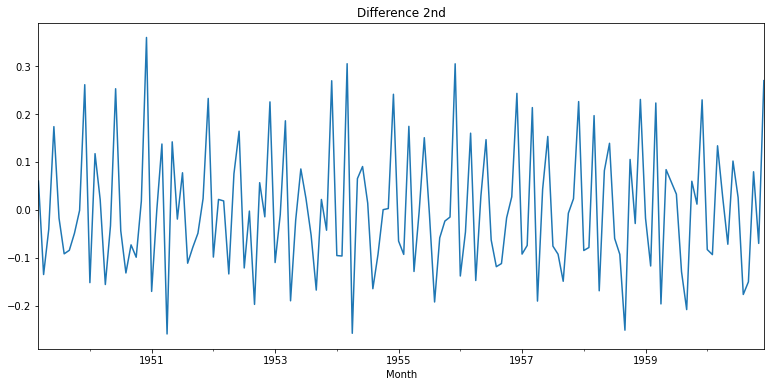

In [35]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

이번 경우에는 1차 차분을 구했을 때 약간 애매한 수준의 안정화 상태를 보였습니다.<br> 2차 차분을 구했을 때는 확실히 안정화 상태였지만 이번 경우에는 d=1로 먼저 시도해 볼 수 있을 것 같습니다. d 값도 바꿔 가면서 최적의 값을 찾아보기를 권합니다.

### 3. 학습 데이터 분리

아래와 같이 시계열 데이터에서 학습 데이터와 테스트 데이터를 분리해 봅시다. 분리 비율은 학습과 테스트에 9:1로 하겠습니다.<br>
시계열 예측이니만큼 가장 나중 데이터를 테스트용으로 사용하는 것이 타당할 것입니다.



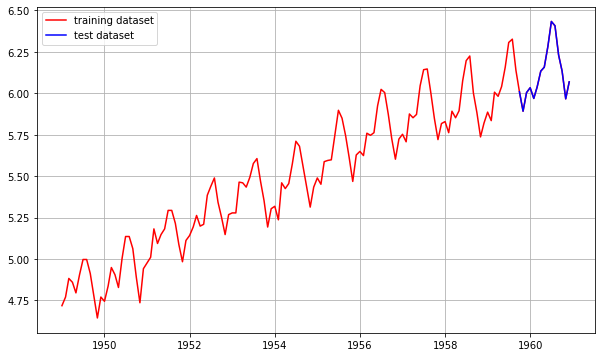

In [36]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

아래와 같이 데이터셋의 형태를 확인해 봅시다.

In [38]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


## 3-8. ARIMA 모델 훈련과 추론

ARIMA 모델을 훈련하는 것은 아래와 같이 간단합니다.

In [40]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(14, 1, 0)   Log Likelihood                 219.942
Date:                Mon, 02 May 2022   AIC                           -409.883
Time:                        01:14:10   BIC                           -367.103
Sample:                    01-01-1949   HQIC                          -392.502
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2651      0.081     -3.277      0.001      -0.424      -0.107
ar.L2         -0.0044      0.108     -0.040      0.968      -0.216       0.208
ar.L3          0.0021      0.046      0.046      0.9

ARIMA 모델이 훈련 결과를 시각적으로 확인해 보겠습니다.

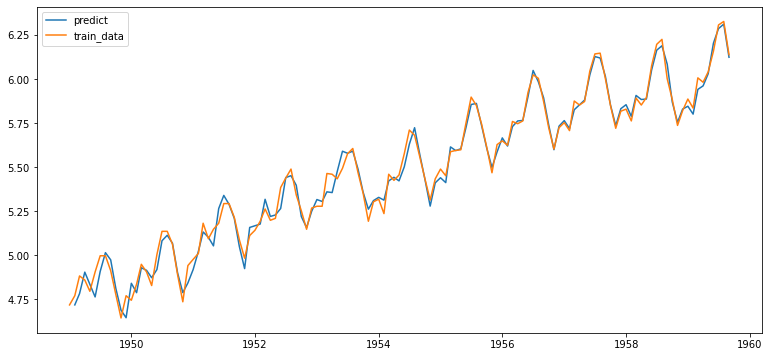

In [41]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측해 봅니다.

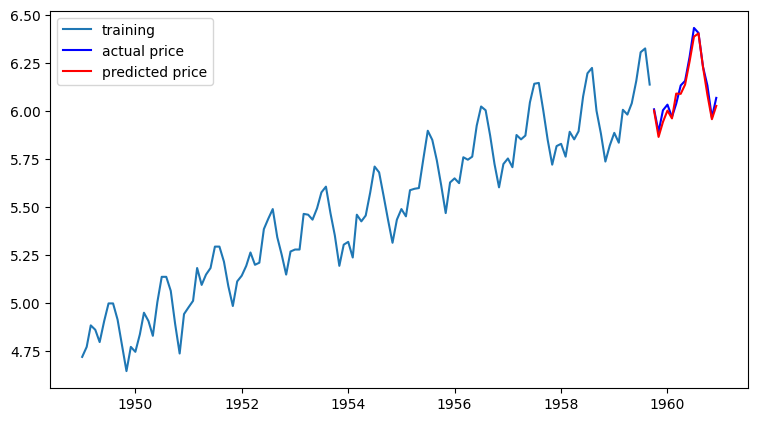

In [42]:
model = ARIMA(train_data, order=(14, 1, 0))  # p값을 14으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

시계열 데이터를 로그 변환하여 사용했으므로 다시 지수 변환해야 정확한 오차를 계산할 수 있습니다. np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산합니다.

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  236.27939252509398
MAE:  12.55810531713422
RMSE:  15.371382258115045
MAPE: 2.76%


최종적으로 예측 모델의 메트릭으로 활용하기에 적당한 MAPE 기준으로 10% 정도의 오차율을 보입니다. 썩 만족스럽지 않은데, 더 적당한 모수를 찾을 수 있다면 개선의 여지가 있을지 모르겠습니다. p=14을 줄 경우 MAPE가 2% 정도로 내려갑니다.
조금더 다양한 테스트를 거쳐 최적화된 모델을 만들어 보시면 좋을것 같습니다.

다음 스텝에서 훨씬 크고 실전적인 데이터셋에 도전해 봅시다!!